mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


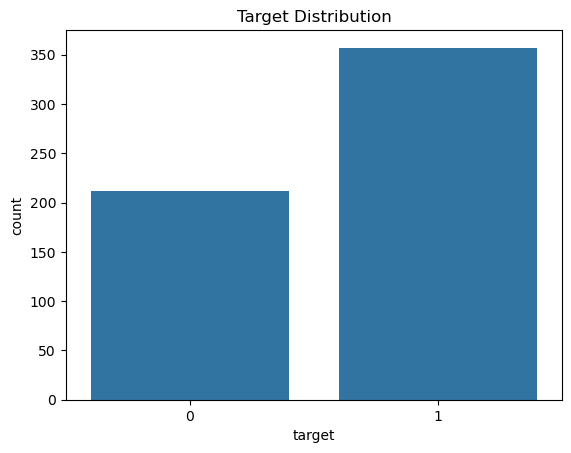

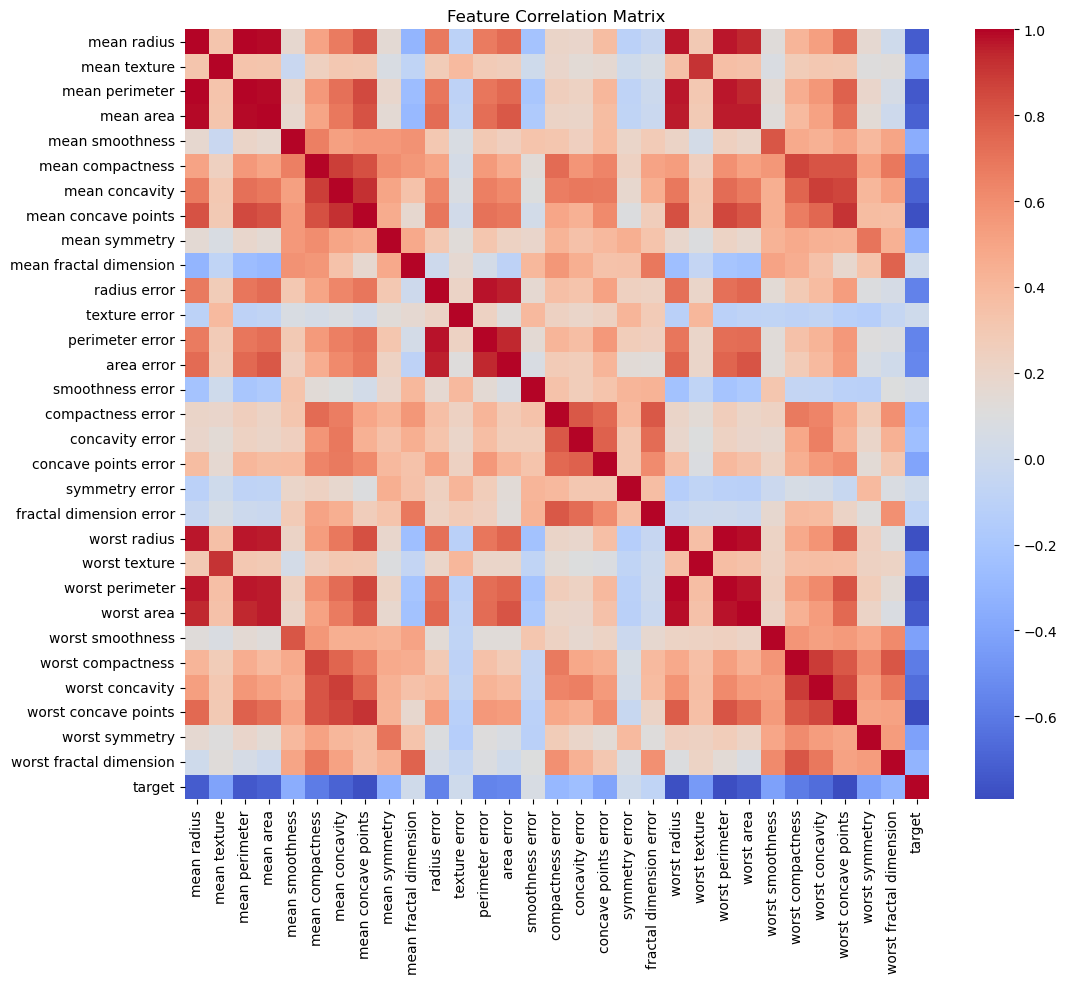

Naive Bayes:
Confusion Matrix:
[[ 57   7]
 [  4 103]]
Accuracy: 0.9357
Precision: 0.9364
Recall: 0.9626
F1-Score: 0.9493

K-Nearest Neighbors (k=3):
Confusion Matrix:
[[ 56   8]
 [  0 107]]
Accuracy: 0.9532
Precision: 0.9304
Recall: 1.0000
F1-Score: 0.9640

K-Nearest Neighbors (k=5):
Confusion Matrix:
[[ 57   7]
 [  0 107]]
Accuracy: 0.9591
Precision: 0.9386
Recall: 1.0000
F1-Score: 0.9683

K-Nearest Neighbors (k=7):
Confusion Matrix:
[[ 58   6]
 [  0 107]]
Accuracy: 0.9649
Precision: 0.9469
Recall: 1.0000
F1-Score: 0.9727

Decision Tree with Post-Pruning (ccp_alpha=0.01):
Confusion Matrix:
[[ 57   7]
 [  6 101]]
Accuracy: 0.9240
Precision: 0.9352
Recall: 0.9439
F1-Score: 0.9395



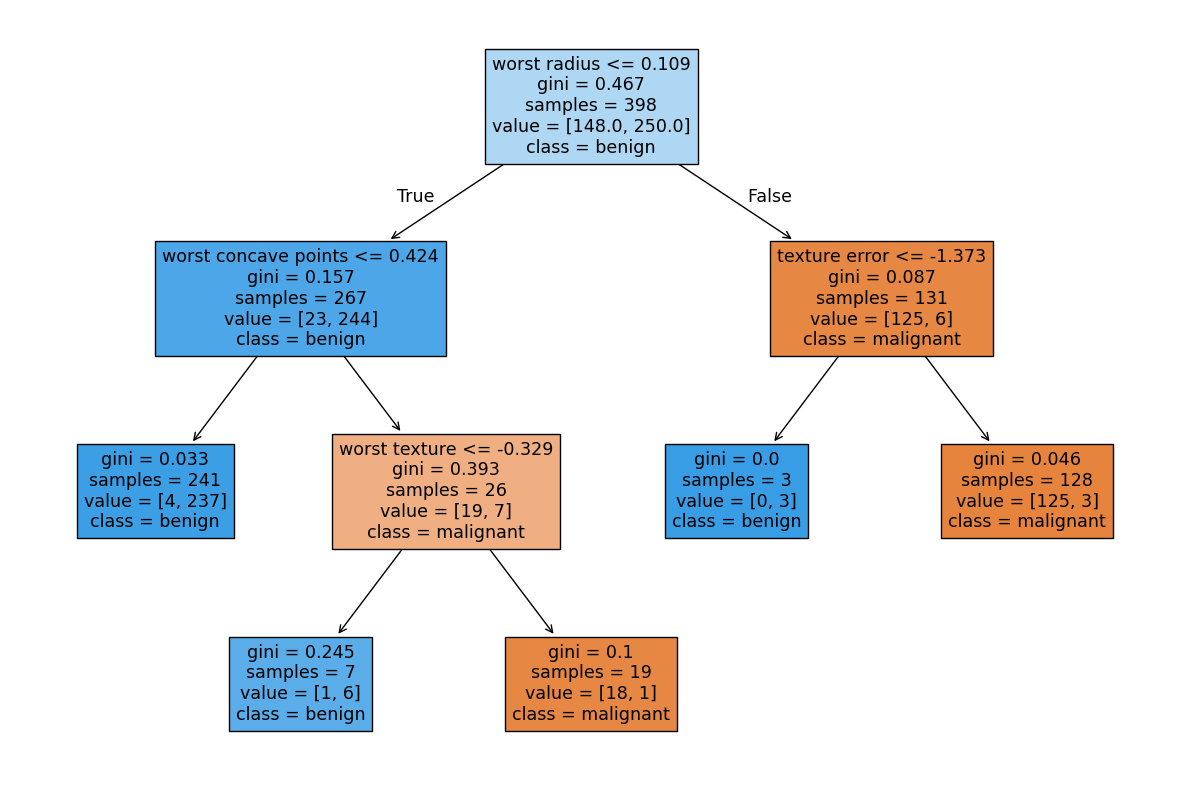

Logistic Regression:
Confusion Matrix:
[[ 63   1]
 [  1 106]]
Accuracy: 0.9883
Precision: 0.9907
Recall: 0.9907
F1-Score: 0.9907

Model Comparison:
Confusion Matrix:
[[ 57   7]
 [  4 103]]
Accuracy: 0.9357
Precision: 0.9364
Recall: 0.9626
F1-Score: 0.9493

Confusion Matrix:
[[ 56   8]
 [  0 107]]
Accuracy: 0.9532
Precision: 0.9304
Recall: 1.0000
F1-Score: 0.9640

Confusion Matrix:
[[ 57   7]
 [  0 107]]
Accuracy: 0.9591
Precision: 0.9386
Recall: 1.0000
F1-Score: 0.9683

Confusion Matrix:
[[ 58   6]
 [  0 107]]
Accuracy: 0.9649
Precision: 0.9469
Recall: 1.0000
F1-Score: 0.9727

Confusion Matrix:
[[ 57   7]
 [  6 101]]
Accuracy: 0.9240
Precision: 0.9352
Recall: 0.9439
F1-Score: 0.9395

Confusion Matrix:
[[ 63   1]
 [  1 106]]
Accuracy: 0.9883
Precision: 0.9907
Recall: 0.9907
F1-Score: 0.9907

                     Accuracy  Precision    Recall  F1-Score
Naive Bayes          0.935673   0.936364  0.962617  0.949309
KNN (k=3)            0.953216   0.930435  1.000000  0.963964
KNN (k=5)      

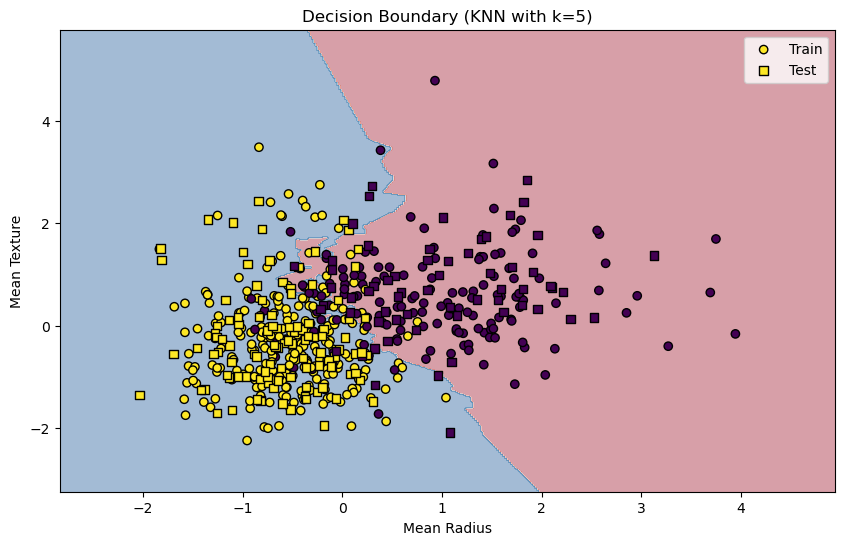

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Data Preparation
# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Check for missing values
print(df.isnull().sum())

# Split the dataset (70% train, 30% test)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Exploratory Data Analysis (EDA)
# Visualizing the target distribution
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# 3. Model Implementation and Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}\n")
    return acc, prec, rec, f1

# a) Naive Bayes
print("Naive Bayes:")
nb = GaussianNB()
nb.fit(X_train, y_train)
evaluate_model(nb, X_test, y_test)

# b) K-Nearest Neighbors (KNN) with k = 3, 5, 7
for k in [3, 5, 7]:
    print(f"K-Nearest Neighbors (k={k}):")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    evaluate_model(knn, X_test, y_test)

# c) Decision Tree with Post-Pruning
print("Decision Tree with Post-Pruning (ccp_alpha=0.01):")
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)  # Post-pruning
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test)

# Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

# d) Logistic Regression
print("Logistic Regression:")
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test)

# 4. Model Comparison
print("Model Comparison:")
models = {
    'Naive Bayes': nb,
    'KNN (k=3)': KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train),
    'KNN (k=7)': KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train),
    'Decision Tree': dt,
    'Logistic Regression': lr
}

comparison = {}
for name, model in models.items():
    acc, prec, rec, f1 = evaluate_model(model, X_test, y_test)
    comparison[name] = [acc, prec, rec, f1]

# Display the comparison as a DataFrame
comparison_df = pd.DataFrame(comparison, index=['Accuracy', 'Precision', 'Recall', 'F1-Score']).T
print(comparison_df)

# 5. Bonus Task: Hyperparameter Tuning (KNN Example)
print("\nHyperparameter Tuning for KNN:")
param_grid = {'n_neighbors': np.arange(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best K: {grid.best_params_['n_neighbors']}")
evaluate_model(grid.best_estimator_, X_test, y_test)

# Optional: Visualize Decision Boundaries (Using 2D features)
# For demonstration, we use only two features for visualization
X_2d = df[['mean radius', 'mean texture']].values
y_2d = df['target'].values
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42)

# Standardize 2D data
scaler_2d = StandardScaler()
X_train_2d = scaler_2d.fit_transform(X_train_2d)
X_test_2d = scaler_2d.transform(X_test_2d)

# Fit KNN for visualization
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_2d, y_train_2d)

# Decision Boundary Plot
h = 0.02
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdBu)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train_2d, edgecolors='k', marker='o', label='Train')
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_2d, edgecolors='k', marker='s', label='Test')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Decision Boundary (KNN with k=5)')
plt.legend()
plt.show()
